# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', 500)
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


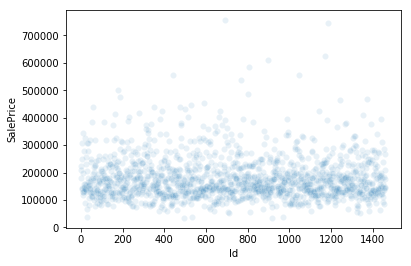

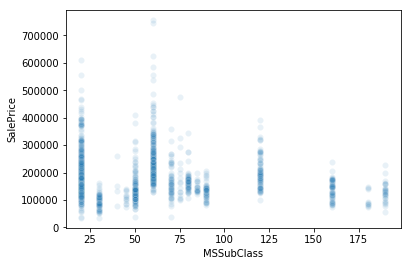

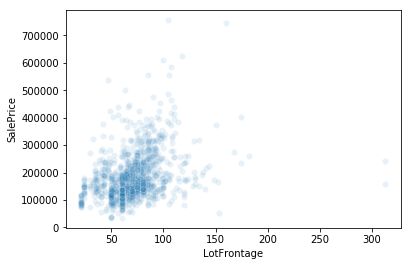

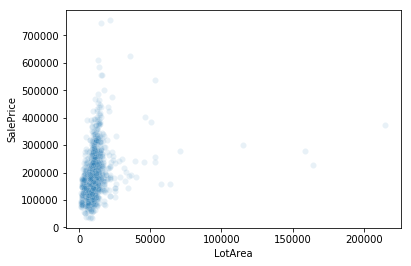

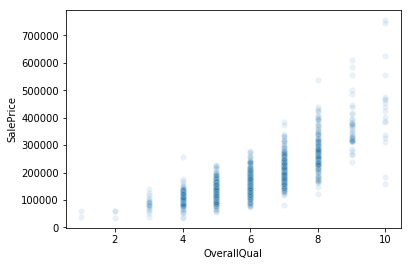

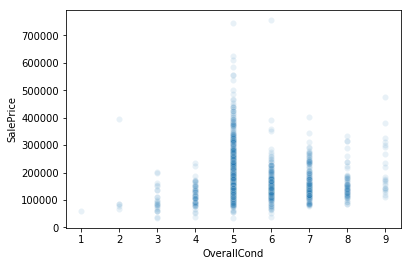

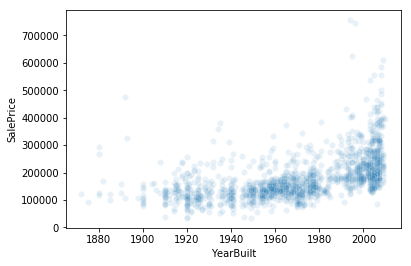

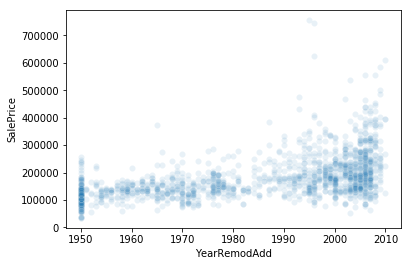

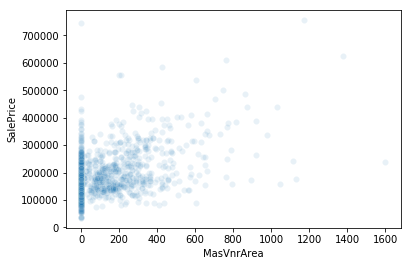

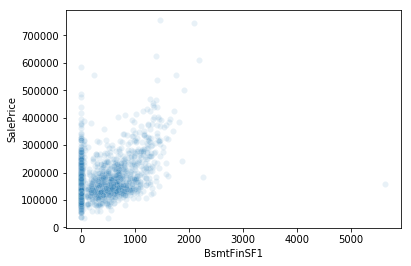

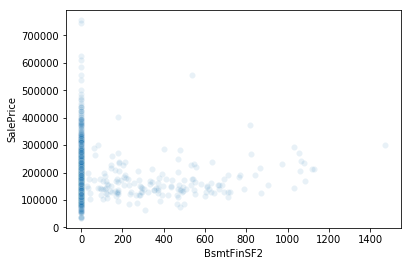

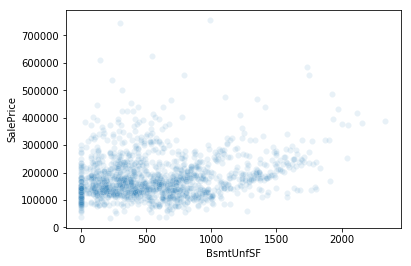

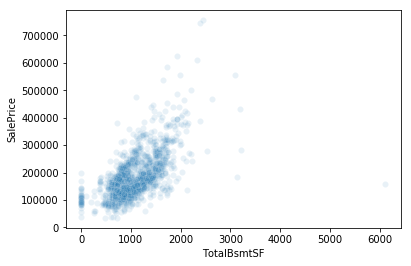

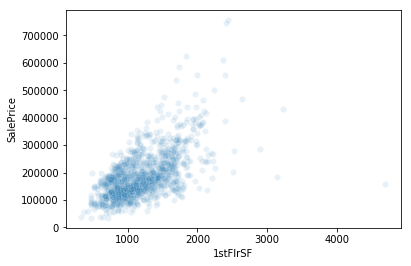

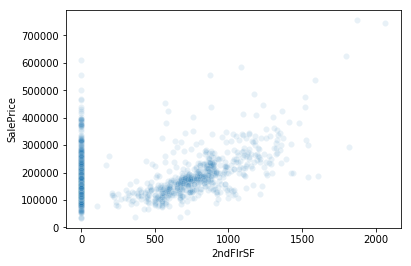

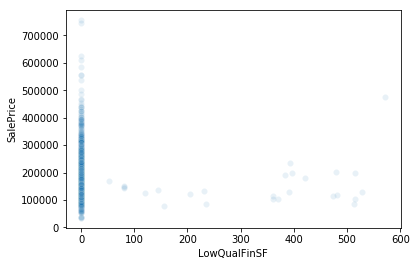

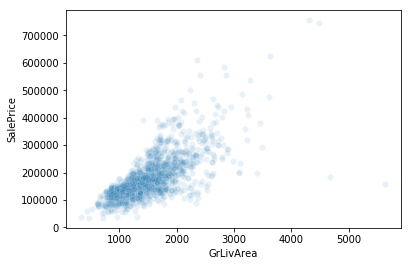

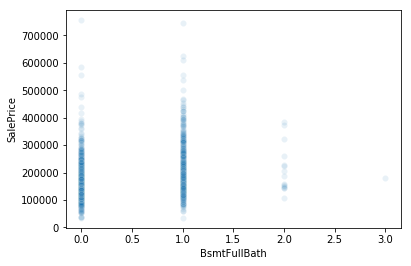

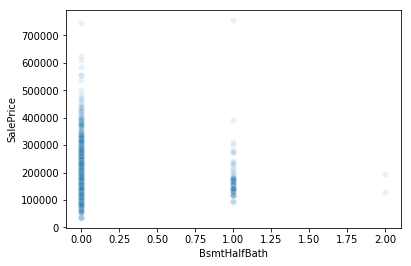

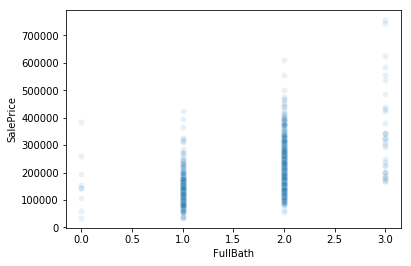

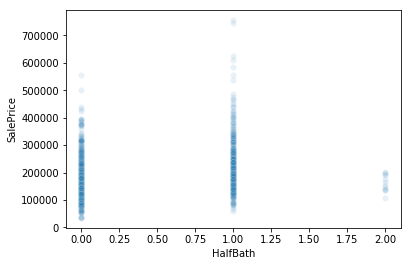

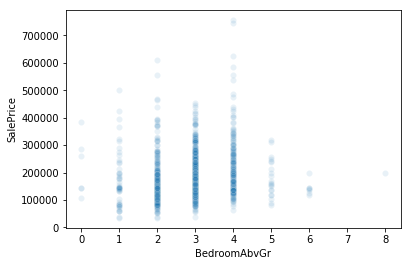

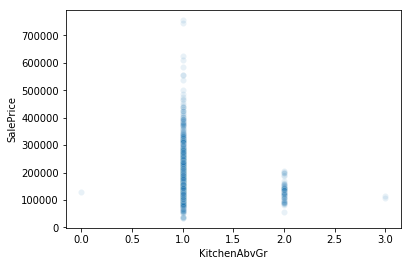

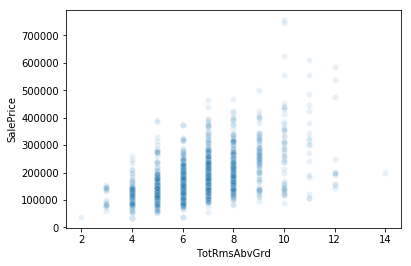

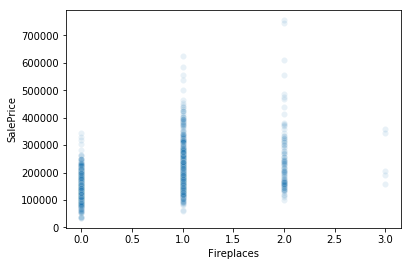

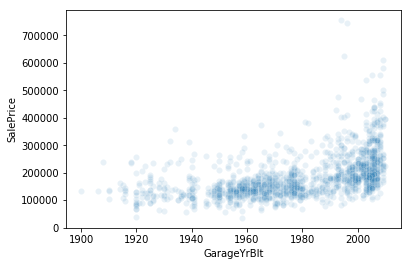

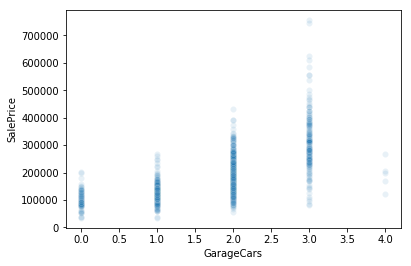

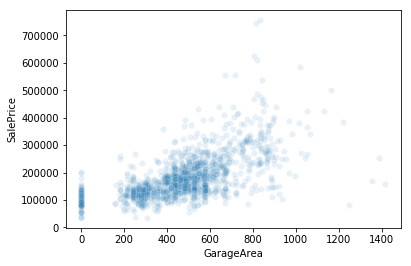

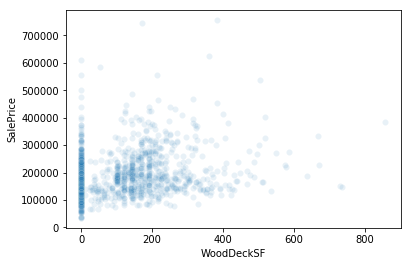

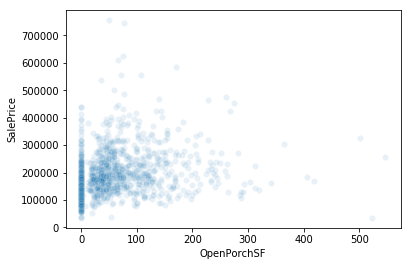

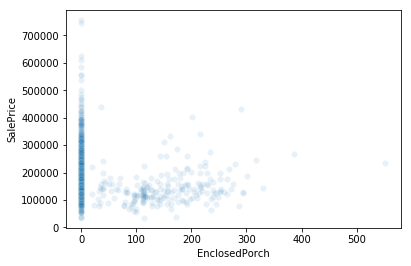

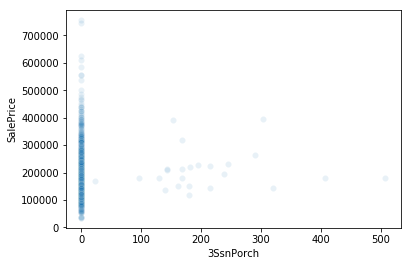

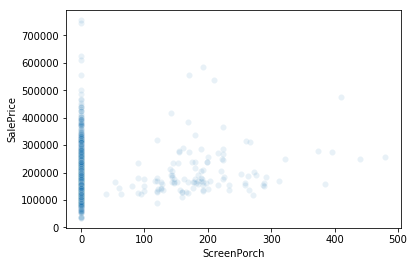

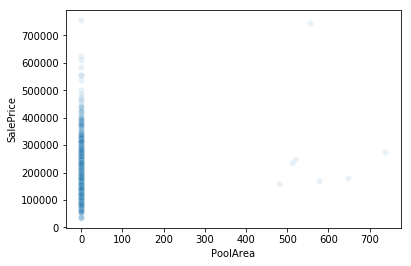

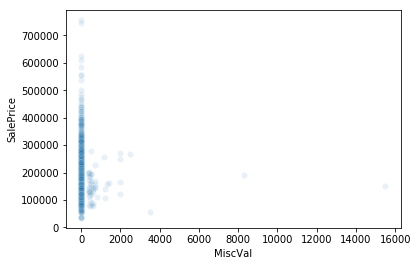

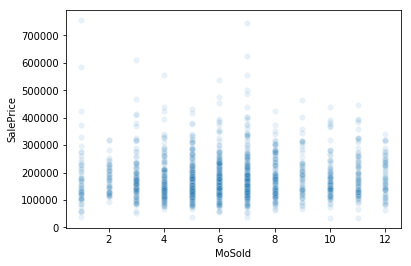

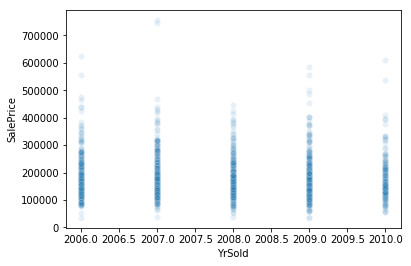

In [3]:
target = 'SalePrice'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

In [0]:
df['OverallQual**2'] = df['OverallQual']**2

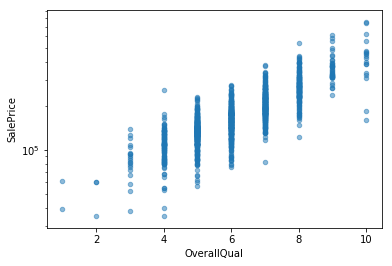

In [5]:
feature = 'OverallQual'
target = 'SalePrice'
df.plot(x=feature, y=target, kind='scatter', alpha=0.5, logy=True);


R^2 0.6677903728940002


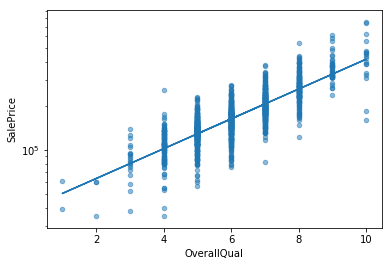

In [6]:
ax = df.plot(x=feature, y=target, kind='scatter', alpha=0.5, logy=True)

X = df[[feature]]
y = np.log(df[target]) # Apply natural log function to the target
model = LinearRegression()
model.fit(X, y)
y_pred = np.exp(model.predict(X)) # Apply exponential function (inverse of natural log) to the predictions
ax.plot(X, y_pred) 
print('R^2', model.score(X, y))

In [0]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [8]:
def run_linear_model(X, y):

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to TEST target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))#root mean square error, how far we are off by average
    r2 = r2_score(y_test, y_pred)#percentage off target, negative r score means you are doing worse

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)#print intercept
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)

Root Mean Squared Error 0.23109511377446032
R^2 Score 0.7138205628839367
Intercept 10.618043400398314
OverallQual    0.230759


In [0]:
y = df[target]
X = df[['OverallQual','OverallQual**2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [10]:
X = df[['OverallQual','OverallQual**2']]
X_train.shape, y_train.shape

((1168, 2), (1168,))

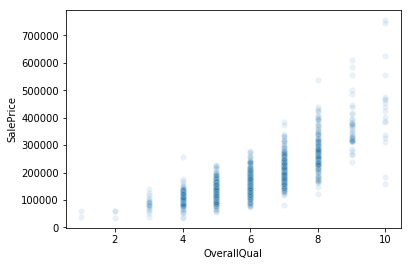

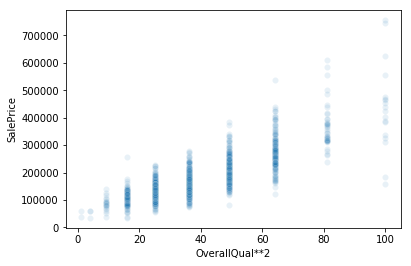

In [11]:
for feature in ['OverallQual','OverallQual**2']:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

In [12]:
def run_linear_model(X, y):

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to TEST target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))#root mean square error, how far we are off by average
    r2 = r2_score(y_test, y_pred)#percentage off target, negative r score means you are doing worse

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)#print intercept
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)

Root Mean Squared Error 46635.77592570267
R^2 Score 0.7164533114439823
Intercept 144664.1708952135
OverallQual      -34522.105042
OverallQual**2     6306.341845


123651.5708197075x**0 + -135806.610278459x**1 + 80474.68139486104x**2 + -18288.338556191433x**3 + 1889.5352710396528x**4 + -69.79470545634103x**5
R^2 0.6839537783809775


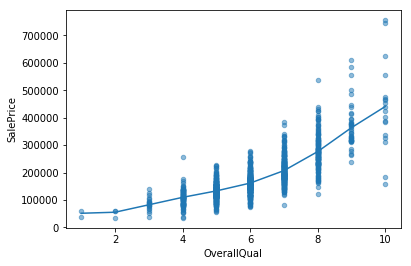

In [13]:
# Generalize for higher degree polynomials, and print equation

df = df.sort_values(by='OverallQual')
def polynomial_regression(degrees=2):
    
    # Make polynomial features
    feature = 'OverallQual'
    polynomial_features = []#list of feature
    for degree in range(2, degrees+1):#squaring, going up to however many degrees
        name = f'{feature} ** {degree}'#give feature a name
        df[name] = df[feature] ** degree#raise it to however many degrees
        polynomial_features.append(name)
    
    features = [feature] + polynomial_features#what features I'm going to use? original feature plus polynomial feature ist
    target  = 'SalePrice'
    X = df[features]
    y = df[target]
    model = LinearRegression()
    model.fit(X, y)
    
    ax = df.plot(x=feature, y=target, kind='scatter', alpha=0.5)#plot original data
    ax.plot(df[feature], model.predict(X))#plot predictions
    betas = [model.intercept_] + model.coef_.tolist()
    equation = ' + '.join(f'{beta}x**{i}' for i, beta in enumerate(betas))
    print(equation)
    print('R^2', model.score(X, y))
    
polynomial_regression(5)#cubic fit
#date, date squared, date cubed

In [14]:
interact(polynomial_regression, degrees=(1,10))

interactive(children=(IntSlider(value=2, description='degrees', max=10, min=1), Output()), _dom_classes=('widg…

<function __main__.polynomial_regression>

In [0]:
list(df.columns.values)

In [19]:
df['ln_SalePrice'] = np.log(df['SalePrice'])
target = 'ln_SalePrice'
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'SalePrice', 'Id'])
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'OverallQual**2', 'OverallQual ** 2',
       'OverallQual ** 3', 'OverallQual ** 4', 'OverallQual ** 5',
       'ln_OverallQual'],
      dtype='object')

In [20]:
# Non-Feature Engineered Baseline Model
y = df[target]
X = df[features]
run_linear_model(X, y)

Root Mean Squared Error 46635.77592570267
R^2 Score 0.7164533114439823
Intercept 144664.1708952135
OverallQual      -34522.105042
OverallQual**2     6306.341845


In [21]:
[col for col in df if 'qual' in col.lower()]

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'LowQualFinSF',
 'KitchenQual',
 'GarageQual',
 'OverallQual**2',
 'OverallQual ** 2',
 'OverallQual ** 3',
 'OverallQual ** 4',
 'OverallQual ** 5',
 'ln_OverallQual']

In [27]:
def average(x):
  avg = sum(x)/len(x)
  return avg

average(df['LotArea'])

10516.828082191782

In [45]:
df_float = df.loc[:, df.dtypes == np.float64]
df_float.head()

,LotFrontage,MasVnrArea,GarageYrBlt,ln_OverallQual,ln_SalePrice
375,NaN,0.0,NaN,0.000000,11.018629
533,50.0,0.0,NaN,0.000000,10.578980
1100,60.0,0.0,1930.0,0.693147,11.002100
916,50.0,0.0,1958.0,0.693147,10.471950
636,51.0,0.0,NaN,0.693147,11.002100


In [0]:
df_int = df.loc[:, df.dtypes == np.int64]
df_int.head().T

In [0]:
df_object = df.loc[:,df.dtypes ==np.object]
df_object.head().T

In [52]:
for col in df_object:
  print(df[col].unique())

['RL' 'C (all)' 'RM' 'RH' 'FV']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['IR1' 'Reg' 'IR2' 'IR3']
['Low' 'Bnk' 'Lvl' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']
['Sev' 'Mod' 'Gtl']
['Edwards' 'BrkSide' 'SWISU' 'IDOTRR' 'NAmes' 'OldTown' 'MeadowV'
 'SawyerW' 'Sawyer' 'Mitchel' 'ClearCr' 'Gilbert' 'Crawfor' 'CollgCr'
 'NWAmes' 'Timber' 'BrDale' 'Veenker' 'Somerst' 'NPkVill' 'Blueste'
 'NridgHt' 'NoRidge' 'Blmngtn' 'StoneBr']
['Norm' 'Artery' 'Feedr' 'RRAn' 'RRAe' 'PosN' 'RRNn' 'PosA' 'RRNe']
['Norm' 'Feedr' 'Artery' 'RRNn' 'RRAe' 'RRAn' 'PosA' 'PosN']
['1Fam' 'Duplex' '2fmCon' 'TwnhsE' 'Twnhs']
['1Story' '1.5Fin' '2Story' 'SFoyer' '1.5Unf' '2.5Fin' 'SLvl' '2.5Unf']
['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
['CompShg' 'Tar&Grv' 'Roll' 'Metal' 'WdShngl' 'WdShake' 'Membran'
 'ClyTile']
['Wd Sdng' 'VinylSd' 'AsbShng' 'BrkFace' 'Stucco' 'BrkComm' 'MetalSd'
 'Plywood' 'HdBoard' 'CemntBd' 'WdShing' 'CBlock' 'AsphShn' 'Stone'
 'ImStucc']
['Wd Sdng' 'VinylSd' 'AsbShng

In [0]:
def average(x):
  avg = sum(x)/len(x)
  return avg


df['ExterBsmtKitchenGarageQual'] = df[]

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data